## Preprocessing the Data

#### Defining Hyperarameters

In [1]:
# General Params
MAIN_SEED = 42  # Random Seed

# For first aproach
USE_LESS_DATA = True  # If not enough mem available
LR = 0.01  # Learning Rate
BATCH_SIZE = 32  # Batch Size
EPOCH = 50
IMAGE_RESIZE_X = 200  # Image Width
IMAGE_RESIZE_Y = 200  # Image height
KEEP_COLOR = False  # Keep color in images. Color takes 3x Mem space

In [2]:
import os

for dirname, _, filenames in os.walk('../Leukemia -  Data/training_data'):
    for filename in filenames:
        print(dirname)
        print(f"Total number of file in this folder: {len(filenames)} \n")
        break

../Leukemia -  Data/training_data\fold_0\all
Total number of file in this folder: 2397 

../Leukemia -  Data/training_data\fold_0\hem
Total number of file in this folder: 1130 

../Leukemia -  Data/training_data\fold_1\all
Total number of file in this folder: 2418 

../Leukemia -  Data/training_data\fold_1\hem
Total number of file in this folder: 1163 

../Leukemia -  Data/training_data\fold_2\all
Total number of file in this folder: 2457 

../Leukemia -  Data/training_data\fold_2\hem
Total number of file in this folder: 1096 



* Next lets find the class numbers in training set:

In [3]:
total_all_count = 0
total_hem_count = 0
for dirname, _, filenames in os.walk('../Leukemia -  Data/training_data'):
    for filename in filenames:
        all_count = 0
        hem_count = 0
        if "training" in dirname:
            if "all" in dirname:
                all_count = len(filenames)
            elif "hem" in dirname:
                hem_count = len(filenames)
            total_all_count += all_count
            total_hem_count += hem_count
            break
print(f"HEM(Normal) Cell Count {total_hem_count} \nALL(Leukemia) Cell Count {total_all_count}")

HEM(Normal) Cell Count 3389 
ALL(Leukemia) Cell Count 7272


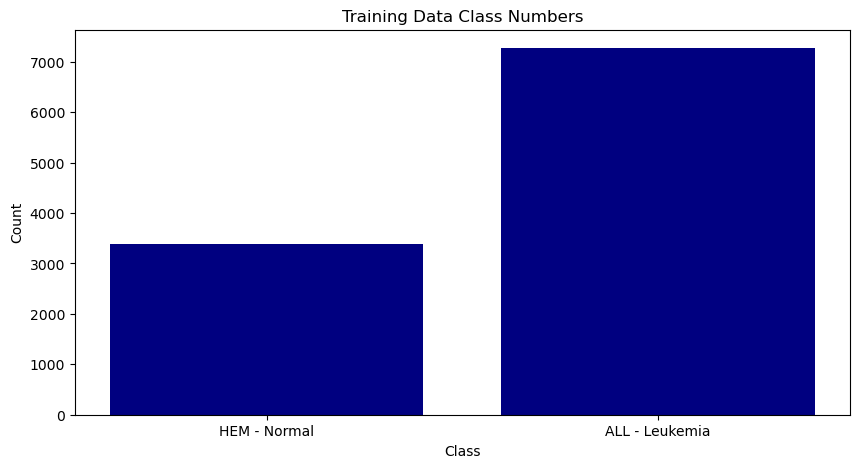

In [4]:
import matplotlib.pyplot as plt

# Data
data = {'HEM - Normal':total_hem_count, 'ALL - Leukemia':total_all_count}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='navy')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Data Class Numbers")
plt.show()

* As we can see the dataset is not balanced.
* Lets print some example images from both classes:

Text(0.5, 1.0, 'HEM - Normal')

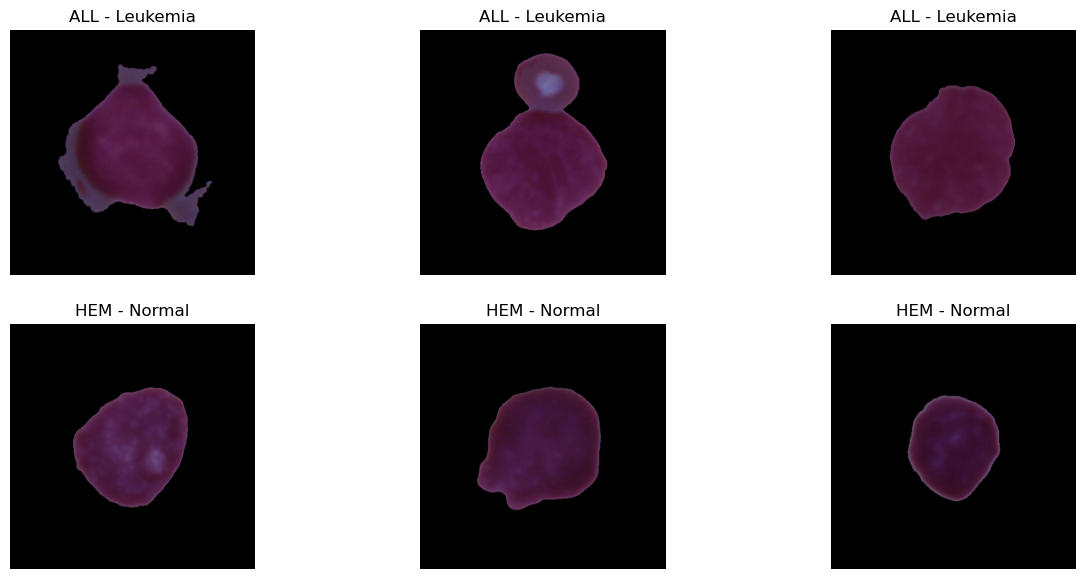

In [5]:
import cv2 as cv

im1_path = "../Leukemia -  Data/training_data/fold_1/all/UID_16_29_1_all.bmp"
im2_path = "../Leukemia -  Data/training_data/fold_1/all/UID_16_13_1_all.bmp"
im3_path = "../Leukemia -  Data/training_data/fold_1/all/UID_16_11_1_all.bmp"
im4_path = "../Leukemia -  Data/training_data/fold_1/hem/UID_H10_102_4_hem.bmp"
im5_path = "../Leukemia -  Data/training_data/fold_1/hem/UID_H10_105_2_hem.bmp"
im6_path = "../Leukemia -  Data/training_data/fold_1/hem/UID_H10_107_2_hem.bmp"


im1 = cv.imread(im1_path)
im2 = cv.imread(im2_path)
im3 = cv.imread(im3_path)
im4 = cv.imread(im4_path)
im5 = cv.imread(im5_path)
im6 = cv.imread(im6_path)

# Set figure
rows = 2
columns = 3
fig = plt.figure(figsize=(15, 7))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# im1
plt.imshow(im1)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# im2
plt.imshow(im2)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# im3
plt.imshow(im3)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# im4
plt.imshow(im4)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

#im4
plt.imshow(im5)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

#im6
plt.imshow(im6)
plt.axis('off')
plt.title('HEM - Normal')

### Prepearing The Data

#### Importing the Training Data

In [6]:
# Get image paths

training_all_0 = "../Leukemia -  Data/training_data/fold_0/all/"
training_hem_0 = "../Leukemia -  Data/training_data/fold_0/hem/"
training_all_1 = "../Leukemia -  Data/training_data/fold_1/all/"
training_hem_1 = "../Leukemia -  Data/training_data/fold_1/hem/"
training_all_2 = "../Leukemia -  Data/training_data/fold_2/all/"
training_hem_2 = "../Leukemia -  Data/training_data/fold_2/hem/"
validation_data = "../Leukemia -  Data/validation_data/C-NMC_test_prelim_phase_data/"

In [7]:
# Import Train Data

import pandas as pd

image_paths = []
image_labels = []

for data_folder_path in [training_all_0,training_all_1,training_all_2,training_hem_0,training_hem_1,training_hem_2]:
    all_images_in_folder = os.listdir(data_folder_path)
    for image_path in all_images_in_folder:
        image_label = 1 if 'all' in data_folder_path else 0
        
        image_paths.append(data_folder_path + image_path)
        image_labels.append(image_label)
        
dict_train = {"image_paths":image_paths, "image_labels":image_labels}
df_train = pd.DataFrame(dict_train)

df_train

,image_paths,image_labels
0,../Leukemia - Data/training_data/fold_0/all/U...,1
1,../Leukemia - Data/training_data/fold_0/all/U...,1
2,../Leukemia - Data/training_data/fold_0/all/U...,1
3,../Leukemia - Data/training_data/fold_0/all/U...,1
4,../Leukemia - Data/training_data/fold_0/all/U...,1
...,...,...
10656,../Leukemia - Data/training_data/fold_2/hem/U...,0
10657,../Leukemia - Data/training_data/fold_2/hem/U...,0
10658,../Leukemia - Data/training_data/fold_2/hem/U...,0
10659,../Leukemia - Data/training_data/fold_2/hem/U...,0


Lets print again class counts for training data.
* We use 1 as ALL - Leukemia
* We use 0 as HEM - Normal

In [8]:
df_train['image_labels'].value_counts()

1    7272
0    3389
Name: image_labels, dtype: int64

#### Importing the Validation Data

In [9]:
#Get label csv
df_val = pd.read_csv('../Leukemia -  Data/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

#Drop Patient_ID column and rename columns
df_val['image_paths'] = df_val['new_names']
df_val['image_labels'] = df_val['labels']
df_val = df_val[['image_paths', 'image_labels']]

#Change image path from relative to full
df_val['image_paths'] = df_val['image_paths'].apply(lambda x: '../Leukemia -  Data/validation_data/C-NMC_test_prelim_phase_data/'+x)
df_val

,image_paths,image_labels
0,../Leukemia - Data/validation_data/C-NMC_test...,1
1,../Leukemia - Data/validation_data/C-NMC_test...,1
2,../Leukemia - Data/validation_data/C-NMC_test...,1
3,../Leukemia - Data/validation_data/C-NMC_test...,0
4,../Leukemia - Data/validation_data/C-NMC_test...,1
...,...,...
1862,../Leukemia - Data/validation_data/C-NMC_test...,1
1863,../Leukemia - Data/validation_data/C-NMC_test...,1
1864,../Leukemia - Data/validation_data/C-NMC_test...,0
1865,../Leukemia - Data/validation_data/C-NMC_test...,1


Lets print class counts for val data. Remember:
* We use 1 as ALL - Leukedia
* We use 0 as HEM - Normal

In [10]:
df_val['image_labels'].value_counts()

1    1219
0     648
Name: image_labels, dtype: int64

* Shuffle the data with spesific SEED

In [11]:
df_train = df_train.sample(frac=1, random_state=MAIN_SEED)
df_val = df_val.sample(frac=1, random_state=MAIN_SEED)

df_train

,image_paths,image_labels
6830,../Leukemia - Data/training_data/fold_2/all/U...,1
8600,../Leukemia - Data/training_data/fold_1/hem/U...,0
4080,../Leukemia - Data/training_data/fold_1/all/U...,1
3079,../Leukemia - Data/training_data/fold_1/all/U...,1
582,../Leukemia - Data/training_data/fold_0/all/U...,1
...,...,...
5734,../Leukemia - Data/training_data/fold_2/all/U...,1
5191,../Leukemia - Data/training_data/fold_2/all/U...,1
5390,../Leukemia - Data/training_data/fold_2/all/U...,1
860,../Leukemia - Data/training_data/fold_0/all/U...,1


#### Removing Black Areas From Data

Removing black areas will reduce the pixel count we have to deal when training or testing a model. We can consider this as deleting irrelevant features from dataset. This preprocess has a lot advantages:

* We need less memory to load images
* We need less features to train a model
* We need less memory to train model(less model weight number)
* Our model will learn faster because less irrelevant features.
* Out model will learn faster because less feature number(More features mean more process calc)

In [12]:
import numpy as np

def read_and_crop_image(image_path):
    # Read image
    image = cv.imread(image_path)
    # Convert Color System from BGR(Blue, Green, Red) to GRAY
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # Aplly Otsu's Thresholding
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    
    # Apply threshold
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    
    # Crop Image
    crop_img = image[mnx:mxx,mny:mxy,:]
    #resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))
    
    # We can see resizing params as hyperparameters
    # This will determine sample feature count
    # Note: We keep Heigh/Width Ratio by Filling Black
    # Because just resizing will change cell shape structure
    border_v = 0
    border_h = 0
    if (IMAGE_RESIZE_Y/IMAGE_RESIZE_X) >= (crop_img.shape[0]/crop_img.shape[1]):
        border_v = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[1])-crop_img.shape[0])/2)
    else:
        border_h = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[0])-crop_img.shape[1])/2)
    
    crop_img = cv.copyMakeBorder(crop_img, border_v, border_v, border_h, border_h, cv.BORDER_CONSTANT, 0)
    resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))
    
    # Return colorful image if KEEP_COLOR set
    if KEEP_COLOR:
        return resized_image
    else:
        return cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
    
    return resized_image

* Before crop

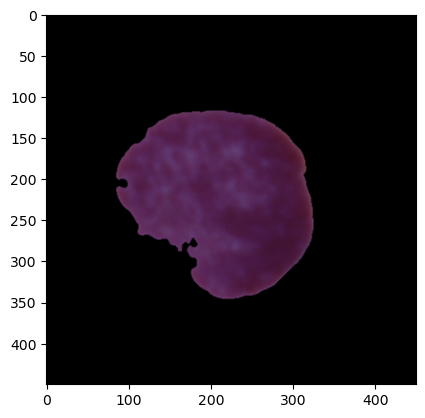

In [13]:
sample_path = df_train[:1]['image_paths'].values[0]

image = cv.imread(sample_path)
plt.imshow(image)
plt.show()

* After crop

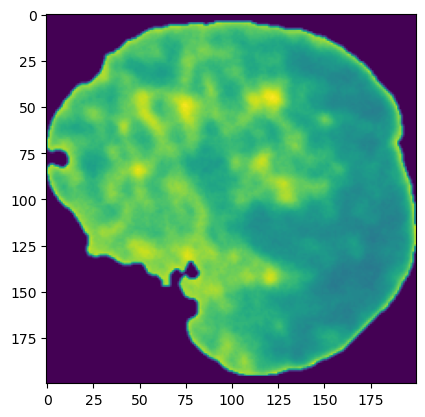

In [14]:
image = df_train[:1]['image_paths'].apply(read_and_crop_image).values[0]

plt.imshow(image)
plt.show()